

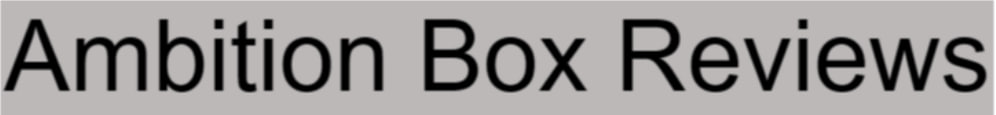

# Web Sraping Project

***This project is a web scraping project which has scraped data from Website Ambition Box which includes lot of information about diffrent companies like reviews, Salary, Jobs, Interview and Rating and many more infos.However we have scraped the following features of the companies :***

* Review
* Salary Offered
* Job Opportunities
* Interview
* Rating


***And this is done on 10 pages of the website Ambition Box.And finally combining info from all the 10 pages into a single dataFrame and then diffrent interesting insights have been drawn from the data Obtained.***


In [1]:
#!pip install requests

In [2]:
#!pip install beautifulsoup4

# Importing Libraries

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Webscraping from Ambition Box Webpage

headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1',headers=headers).text



<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script async="" src="https://www.googletagmanager.com/gtag/js"></script>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>
<title>List of companies in India | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n-head=
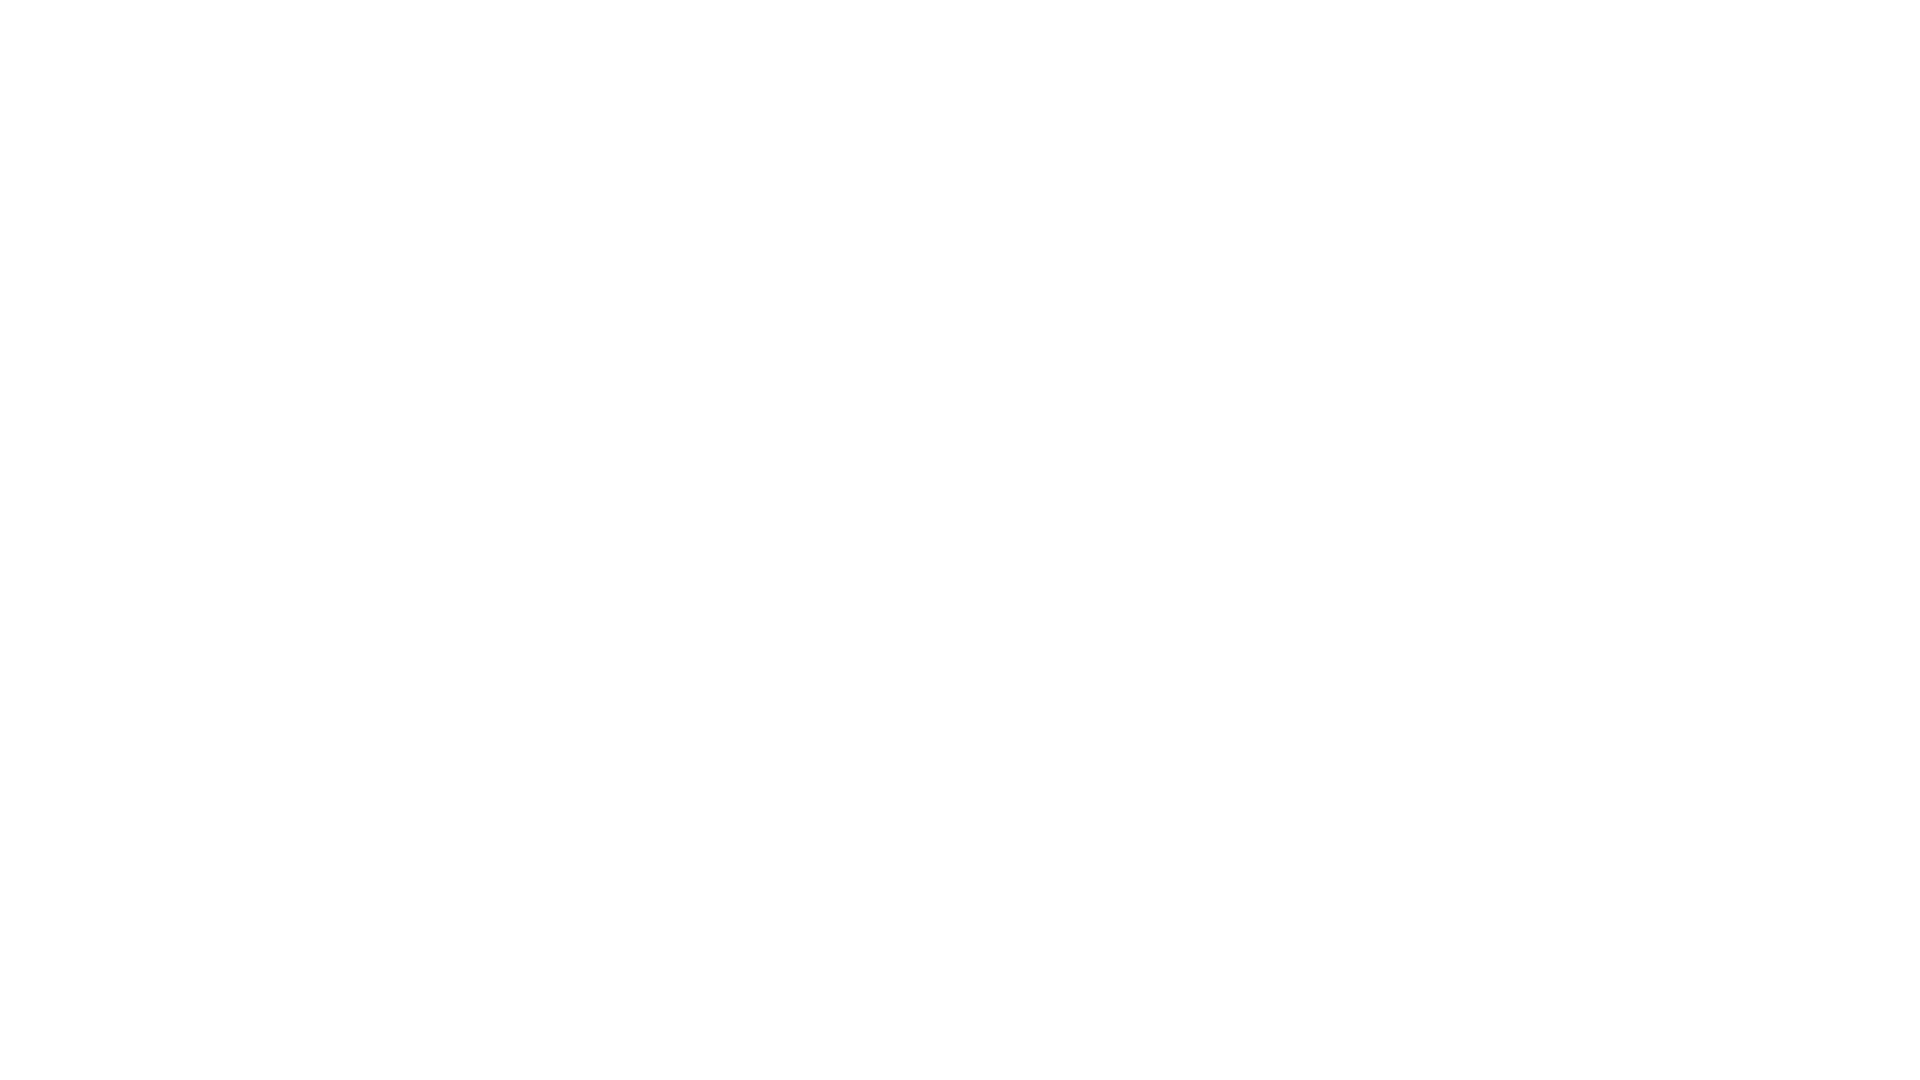

In [5]:
soup=BeautifulSoup(webpage,'lxml')
soup

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/
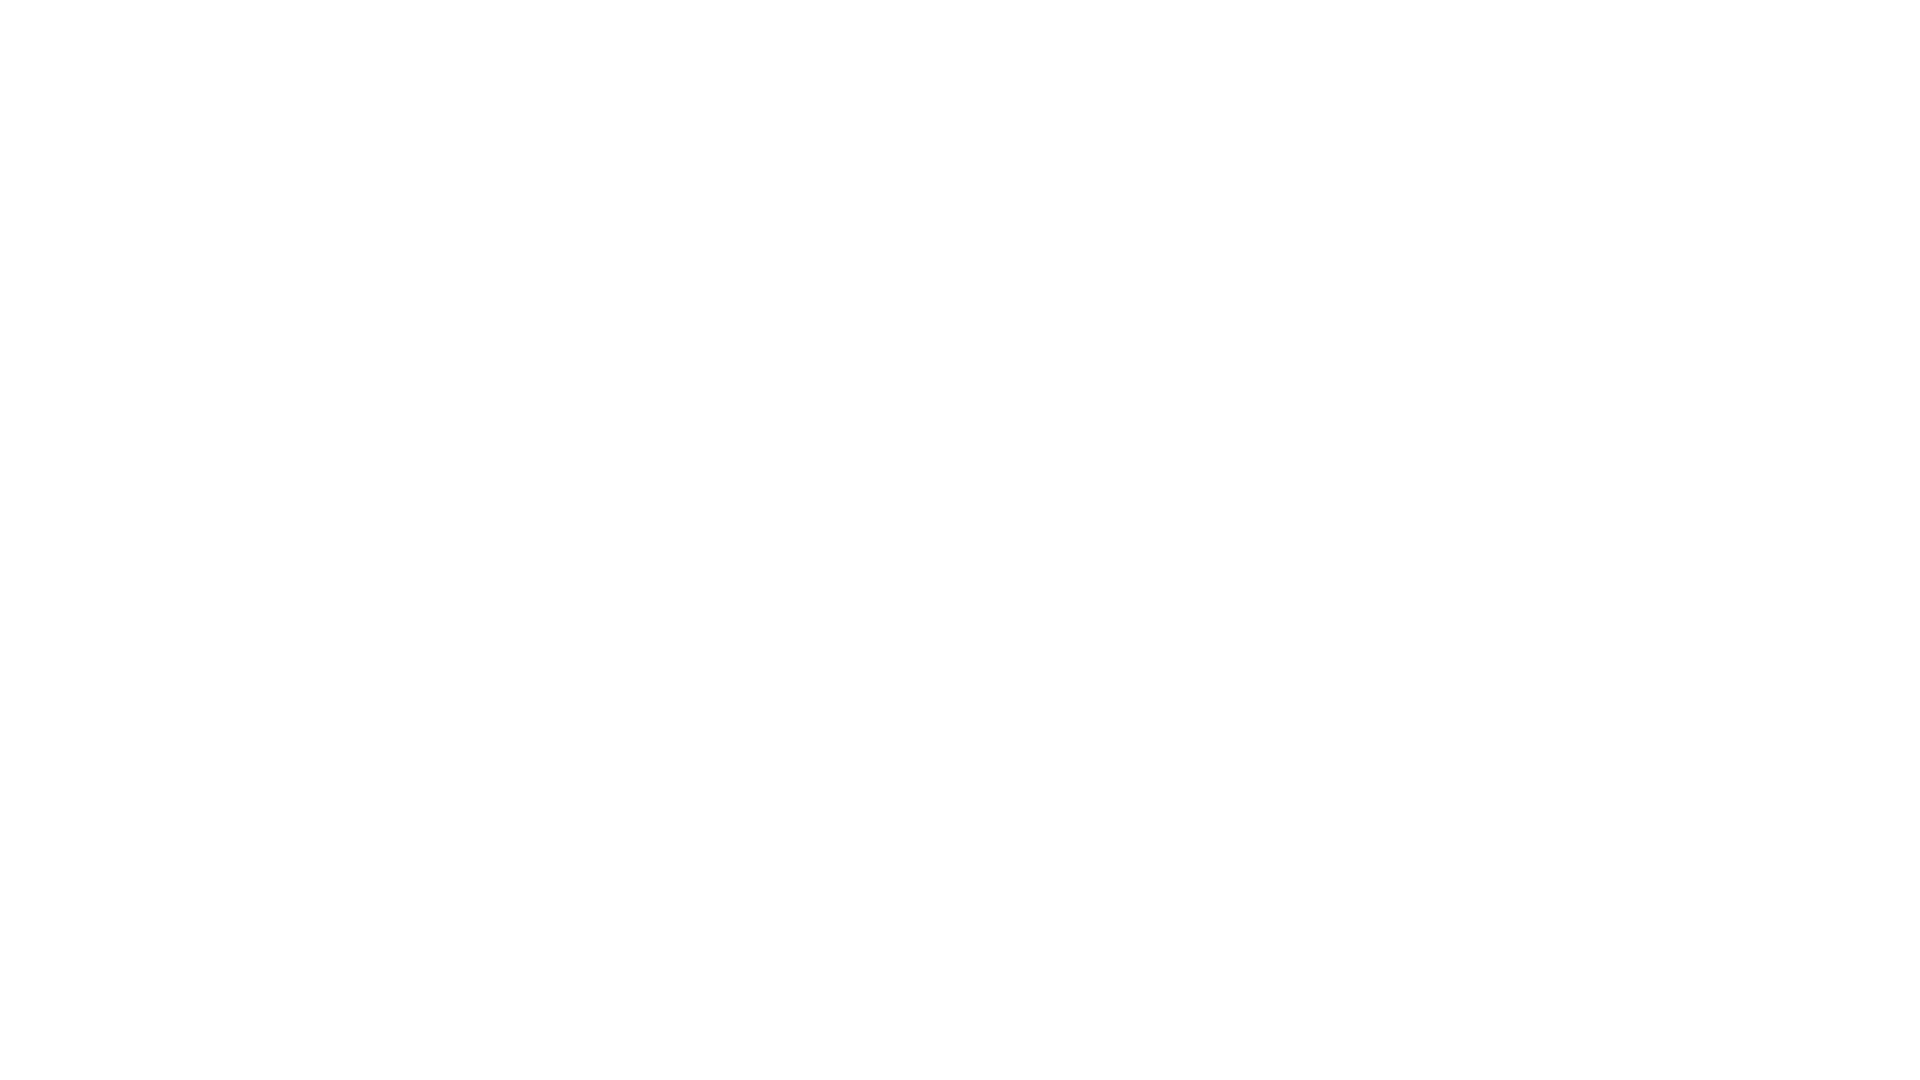

In [6]:
print(soup.prettify())

In [7]:
soup.find_all('h1')[0].text.strip()
     

'List of companies in India'

## TO FIND OUT NAMES OF THE COMPANIES

In [8]:
company=[]
for i in soup.find_all('h2',class_='companyCardWrapper__companyName'):
  print(i.text.strip())
  company.append(i.text.strip())


    
print(company)    

TCS
Accenture
Cognizant
Wipro
ICICI Bank
HDFC Bank
Infosys
Capgemini
Tech Mahindra
HCLTech
Genpact
Axis Bank
Concentrix Corporation
Amazon
Reliance Jio
IBM
Larsen & Toubro Limited
HDB Financial Services
Reliance Retail
Teleperformance
['TCS', 'Accenture', 'Cognizant', 'Wipro', 'ICICI Bank', 'HDFC Bank', 'Infosys', 'Capgemini', 'Tech Mahindra', 'HCLTech', 'Genpact', 'Axis Bank', 'Concentrix Corporation', 'Amazon', 'Reliance Jio', 'IBM', 'Larsen & Toubro Limited', 'HDB Financial Services', 'Reliance Retail', 'Teleperformance']


# TO FIND OUT THE RATINGS

In [9]:
rating=[]
for i in soup.find_all('span',class_='companyCardWrapper__companyRatingValue'):
    print(i.text.strip())
    rating.append(i.text.strip())
    
print(rating)
#soup.find_all('span',class_='companyCardWrapper__companyRatingValue')

3.8
4.1
3.9
3.8
4.0
3.9
3.9
3.9
3.7
3.7
4.0
3.8
3.9
4.2
3.9
4.1
4.0
4.0
3.9
3.6
['3.8', '4.1', '3.9', '3.8', '4.0', '3.9', '3.9', '3.9', '3.7', '3.7', '4.0', '3.8', '3.9', '4.2', '3.9', '4.1', '4.0', '4.0', '3.9', '3.6']


In [10]:
# A dataframe with Company names and Ratings
df=pd.DataFrame({"Company":company,"Ratings":rating})
df

,Company,Ratings
0,TCS,3.8
1,Accenture,4.1
2,Cognizant,3.9
3,Wipro,3.8
4,ICICI Bank,4.0
5,HDFC Bank,3.9
6,Infosys,3.9
7,Capgemini,3.9
8,Tech Mahindra,3.7
9,HCLTech,3.7


In [11]:
company=soup.find_all('div',class_='company-content-wrapper')

In [12]:
review=[]
review_20=[]

for i in soup.find_all('span',class_='companyCardWrapper__ActionCount'):
#     print(i.text.strip())
    temp = i.text.strip()
    if temp == '--':
        temp = temp.replace('--','0')
    review.append(temp.replace('k', ''))
    
review=[float(x) for x in review]
review=[x*1000 for x in review]

review=review[0:120:6]
print(review)
print(len(review))

[63500.0, 40500.0, 36900.0, 33700.0, 29900.0, 29500.0, 27800.0, 25800.0, 24200.0, 23400.0, 23200.0, 19700.0, 18900.0, 18100.0, 17900.0, 17800.0, 16800.0, 15800.0, 15800.0, 14900.0]
20


In [13]:
# Adding a new column Reviews to the DataFrame
df["Reviews"]=review
df

,Company,Ratings,Reviews
0,TCS,3.8,63500.0
1,Accenture,4.1,40500.0
2,Cognizant,3.9,36900.0
3,Wipro,3.8,33700.0
4,ICICI Bank,4.0,29900.0
5,HDFC Bank,3.9,29500.0
6,Infosys,3.9,27800.0
7,Capgemini,3.9,25800.0
8,Tech Mahindra,3.7,24200.0
9,HCLTech,3.7,23400.0


# Scraping the Salaries of the Companies

In [14]:
salary=[]
for i in soup.find_all('span',class_='companyCardWrapper__ActionCount'):
    print(i.text.strip())
    temp = i.text.strip()
    if temp == '--':
        temp = temp.replace('--','0')
    salary.append(temp.replace('k', ''))
    
salary=[float(x) for x in salary]
salary=[x*1000 for x in salary]
salary=salary[1:120:6]
salary

63.5k
734.7k
5.3k
45
25.5k
64
40.5k
513.1k
3.6k
15.4k
18.2k
37
36.9k
497.5k
3.2k
621
14.9k
45
33.7k
370k
3.1k
1.2k
13.3k
35
29.9k
137k
1.6k
202
11.8k
15
29.5k
125.8k
1.3k
431
9.5k
13
27.8k
417.8k
4.3k
902
11.5k
72
25.8k
337.9k
2.2k
688
9.6k
21
24.2k
236.5k
2.1k
1.5k
9.5k
32
23.4k
250k
2.1k
717
8.8k
19
23.2k
176.3k
1.7k
616
10.4k
27
19.7k
94.1k
961
304
7k
16
18.9k
96.8k
917
174
9.2k
16
18.1k
119.3k
3k
701
6.4k
30
17.9k
67k
1k
165
6.7k
23
17.8k
203.3k
1.3k
3.2k
7.4k
14
16.8k
77.9k
919
207
6.8k
25
15.8k
49.4k
502
121
5.7k
17
15.8k
54.5k
999
254
4.5k
51
14.9k
72.7k
991
236
6.1k
15


[734700.0,
 513100.0,
 497500.0,
 370000.0,
 137000.0,
 125800.0,
 417800.0,
 337900.0,
 236500.0,
 250000.0,
 176300.0,
 94100.0,
 96800.0,
 119300.0,
 67000.0,
 203300.0,
 77900.0,
 49400.0,
 54500.0,
 72700.0]

In [15]:
df["Salary"]=salary
df

,Company,Ratings,Reviews,Salary
0,TCS,3.8,63500.0,734700.0
1,Accenture,4.1,40500.0,513100.0
2,Cognizant,3.9,36900.0,497500.0
3,Wipro,3.8,33700.0,370000.0
4,ICICI Bank,4.0,29900.0,137000.0
5,HDFC Bank,3.9,29500.0,125800.0
6,Infosys,3.9,27800.0,417800.0
7,Capgemini,3.9,25800.0,337900.0
8,Tech Mahindra,3.7,24200.0,236500.0
9,HCLTech,3.7,23400.0,250000.0


# Scraping the number of Interviews 

In [16]:
interview=[]

for i in soup.find_all('span',class_='companyCardWrapper__ActionCount'):
    print(i.text.strip())
    temp = i.text.strip()
    if temp == '--':
        temp = temp.replace('--','0')
    interview.append(temp)



63.5k
734.7k
5.3k
45
25.5k
64
40.5k
513.1k
3.6k
15.4k
18.2k
37
36.9k
497.5k
3.2k
621
14.9k
45
33.7k
370k
3.1k
1.2k
13.3k
35
29.9k
137k
1.6k
202
11.8k
15
29.5k
125.8k
1.3k
431
9.5k
13
27.8k
417.8k
4.3k
902
11.5k
72
25.8k
337.9k
2.2k
688
9.6k
21
24.2k
236.5k
2.1k
1.5k
9.5k
32
23.4k
250k
2.1k
717
8.8k
19
23.2k
176.3k
1.7k
616
10.4k
27
19.7k
94.1k
961
304
7k
16
18.9k
96.8k
917
174
9.2k
16
18.1k
119.3k
3k
701
6.4k
30
17.9k
67k
1k
165
6.7k
23
17.8k
203.3k
1.3k
3.2k
7.4k
14
16.8k
77.9k
919
207
6.8k
25
15.8k
49.4k
502
121
5.7k
17
15.8k
54.5k
999
254
4.5k
51
14.9k
72.7k
991
236
6.1k
15


In [17]:

interview

['63.5k',
 '734.7k',
 '5.3k',
 '45',
 '25.5k',
 '64',
 '40.5k',
 '513.1k',
 '3.6k',
 '15.4k',
 '18.2k',
 '37',
 '36.9k',
 '497.5k',
 '3.2k',
 '621',
 '14.9k',
 '45',
 '33.7k',
 '370k',
 '3.1k',
 '1.2k',
 '13.3k',
 '35',
 '29.9k',
 '137k',
 '1.6k',
 '202',
 '11.8k',
 '15',
 '29.5k',
 '125.8k',
 '1.3k',
 '431',
 '9.5k',
 '13',
 '27.8k',
 '417.8k',
 '4.3k',
 '902',
 '11.5k',
 '72',
 '25.8k',
 '337.9k',
 '2.2k',
 '688',
 '9.6k',
 '21',
 '24.2k',
 '236.5k',
 '2.1k',
 '1.5k',
 '9.5k',
 '32',
 '23.4k',
 '250k',
 '2.1k',
 '717',
 '8.8k',
 '19',
 '23.2k',
 '176.3k',
 '1.7k',
 '616',
 '10.4k',
 '27',
 '19.7k',
 '94.1k',
 '961',
 '304',
 '7k',
 '16',
 '18.9k',
 '96.8k',
 '917',
 '174',
 '9.2k',
 '16',
 '18.1k',
 '119.3k',
 '3k',
 '701',
 '6.4k',
 '30',
 '17.9k',
 '67k',
 '1k',
 '165',
 '6.7k',
 '23',
 '17.8k',
 '203.3k',
 '1.3k',
 '3.2k',
 '7.4k',
 '14',
 '16.8k',
 '77.9k',
 '919',
 '207',
 '6.8k',
 '25',
 '15.8k',
 '49.4k',
 '502',
 '121',
 '5.7k',
 '17',
 '15.8k',
 '54.5k',
 '999',
 '254',
 '4.

In [18]:
interviews = []
for item in interview:
    if item.endswith('k'):
        # Remove 'k' and convert to float
        numeric_value = float(item[:-1]) * 1000
    else:
        # Convert to float
        numeric_value = float(item)
    interviews.append(numeric_value)

print(interviews[2:120:6])
len(interviews[2:120:6])

[5300.0, 3600.0, 3200.0, 3100.0, 1600.0, 1300.0, 4300.0, 2200.0, 2100.0, 2100.0, 1700.0, 961.0, 917.0, 3000.0, 1000.0, 1300.0, 919.0, 502.0, 999.0, 991.0]


20

In [19]:
df["Interviews"]=interviews[2:120:6]
df

,Company,Ratings,Reviews,Salary,Interviews
0,TCS,3.8,63500.0,734700.0,5300.0
1,Accenture,4.1,40500.0,513100.0,3600.0
2,Cognizant,3.9,36900.0,497500.0,3200.0
3,Wipro,3.8,33700.0,370000.0,3100.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0
5,HDFC Bank,3.9,29500.0,125800.0,1300.0
6,Infosys,3.9,27800.0,417800.0,4300.0
7,Capgemini,3.9,25800.0,337900.0,2200.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0
9,HCLTech,3.7,23400.0,250000.0,2100.0


In [20]:
jobs=[]

for i in soup.find_all('span',class_='companyCardWrapper__ActionCount'):
    print(i.text.strip())
    temp = i.text.strip()
    if temp == '--':
        temp = temp.replace('--','0')
    jobs.append(temp)

63.5k
734.7k
5.3k
45
25.5k
64
40.5k
513.1k
3.6k
15.4k
18.2k
37
36.9k
497.5k
3.2k
621
14.9k
45
33.7k
370k
3.1k
1.2k
13.3k
35
29.9k
137k
1.6k
202
11.8k
15
29.5k
125.8k
1.3k
431
9.5k
13
27.8k
417.8k
4.3k
902
11.5k
72
25.8k
337.9k
2.2k
688
9.6k
21
24.2k
236.5k
2.1k
1.5k
9.5k
32
23.4k
250k
2.1k
717
8.8k
19
23.2k
176.3k
1.7k
616
10.4k
27
19.7k
94.1k
961
304
7k
16
18.9k
96.8k
917
174
9.2k
16
18.1k
119.3k
3k
701
6.4k
30
17.9k
67k
1k
165
6.7k
23
17.8k
203.3k
1.3k
3.2k
7.4k
14
16.8k
77.9k
919
207
6.8k
25
15.8k
49.4k
502
121
5.7k
17
15.8k
54.5k
999
254
4.5k
51
14.9k
72.7k
991
236
6.1k
15


# Scraping the Job Opportunity 

In [21]:
job = []
for item in jobs:
    if item.endswith('k'):
        # Remove 'k' and convert to float
        numeric_value = float(item[:-1]) * 1000
    else:
        # Convert to float
        numeric_value = float(item)
    job.append(numeric_value)

print(job[3:120:6])
len(job[3:120:6])

[45.0, 15400.0, 621.0, 1200.0, 202.0, 431.0, 902.0, 688.0, 1500.0, 717.0, 616.0, 304.0, 174.0, 701.0, 165.0, 3200.0, 207.0, 121.0, 254.0, 236.0]


20

In [22]:
df["Jobs"]=job[3:120:6]
df

,Company,Ratings,Reviews,Salary,Interviews,Jobs
0,TCS,3.8,63500.0,734700.0,5300.0,45.0
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
2,Cognizant,3.9,36900.0,497500.0,3200.0,621.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1200.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0,202.0
5,HDFC Bank,3.9,29500.0,125800.0,1300.0,431.0
6,Infosys,3.9,27800.0,417800.0,4300.0,902.0
7,Capgemini,3.9,25800.0,337900.0,2200.0,688.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0,1500.0
9,HCLTech,3.7,23400.0,250000.0,2100.0,717.0


In [23]:
# df.to_csv("Page1_AmbitionBox_Reviews.csv")

### Combining All the Individual DataFrames into a Single CSV file

In [24]:
file_paths = ['Page1_AmbitionBox_Reviews.csv', 'Page2_AmbitionBox_Reviews.csv', 'Page3_AmbitionBox_Reviews.csv','Page4_AmbitionBox_Reviews.csv','Page5_AmbitionBox_Reviews.csv','Page6_AmbitionBox_Reviews.csv','Page7_AmbitionBox_Reviews.csv','Page8_AmbitionBox_Reviews.csv','Page9_AmbitionBox_Reviews.csv','Page10_AmbitionBox_Reviews.csv']

combined_data = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

combined_data = combined_data.drop("Unnamed: 0", axis=1)
combined_data

,Company,Ratings,Reviews,Salary,Interviews,Jobs
0,TCS,3.8,63500.0,734700.0,5300.0,45.0
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
2,Cognizant,3.9,36900.0,497500.0,3200.0,620.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0,201.0
...,...,...,...,...,...,...
195,Vishal Mega Mart,3.8,2300.0,7300.0,101.0,5.0
196,CMS IT Services,3.2,2300.0,11500.0,79.0,7.0
197,Glenmark Pharmaceuticals,4.0,2300.0,10800.0,75.0,36.0
198,ABB Group,4.1,2300.0,14900.0,110.0,1.0


In [25]:

# combined_data.to_csv("Combined_Data_AmbitionBox.csv",index=False)

In [26]:
combined_data.describe()

,Ratings,Reviews,Salary,Interviews,Jobs
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,3.97800,6256.000000,44846.000000,422.095000,275.235000
std,0.24147,7699.850811,87438.585965,706.122782,1140.929296
min,3.20000,2300.000000,2800.000000,27.000000,0.000000
25%,3.80000,2800.000000,13175.000000,132.000000,21.000000
50%,4.00000,3600.000000,19350.000000,206.500000,67.000000
75%,4.10000,5500.000000,38425.000000,348.500000,198.000000
max,4.70000,63500.000000,734700.000000,5300.000000,15400.000000


In [27]:
combined_data["Company"].nunique()

200

In [28]:
combined_data=combined_data.drop_duplicates(subset='Company')
combined_data

,Company,Ratings,Reviews,Salary,Interviews,Jobs
0,TCS,3.8,63500.0,734700.0,5300.0,45.0
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
2,Cognizant,3.9,36900.0,497500.0,3200.0,620.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0,201.0
...,...,...,...,...,...,...
195,Vishal Mega Mart,3.8,2300.0,7300.0,101.0,5.0
196,CMS IT Services,3.2,2300.0,11500.0,79.0,7.0
197,Glenmark Pharmaceuticals,4.0,2300.0,10800.0,75.0,36.0
198,ABB Group,4.1,2300.0,14900.0,110.0,1.0


In [29]:
combined_data.sort_values(by=['Ratings'],ascending=False).head(10)

,Company,Ratings,Reviews,Salary,Interviews,Jobs
65,Indian Army,4.7,4600.0,11000.0,100.0,0.0
187,Indian Air Force,4.6,2400.0,5700.0,27.0,0.0
165,Ford Motor,4.5,2500.0,14000.0,70.0,84.0
120,Cummins,4.4,3100.0,14400.0,162.0,15.0
34,iEnergizer,4.4,7200.0,17300.0,255.0,79.0
179,Pidilite Industries,4.4,2400.0,9000.0,109.0,30.0
145,Viatris,4.3,2800.0,14400.0,86.0,4.0
102,Mahindra & Mahindra Financial Services,4.3,3500.0,10600.0,83.0,55.0
157,Piramal Capital Housing Finance,4.3,2700.0,9000.0,118.0,21.0
176,American Express,4.3,2400.0,19200.0,197.0,109.0


**1.Company Ranking**:

Rank the companies based on 'Ratings'. Identify the top-rated and lowest-rated companies.

### a.Top 10 companies based on Ratings

In [30]:
Top_Ten_Ratings=combined_data.sort_values(by=["Ratings"],ascending=False).head(10)
Top_Ten_Ratings

,Company,Ratings,Reviews,Salary,Interviews,Jobs
65,Indian Army,4.7,4600.0,11000.0,100.0,0.0
187,Indian Air Force,4.6,2400.0,5700.0,27.0,0.0
165,Ford Motor,4.5,2500.0,14000.0,70.0,84.0
120,Cummins,4.4,3100.0,14400.0,162.0,15.0
34,iEnergizer,4.4,7200.0,17300.0,255.0,79.0
179,Pidilite Industries,4.4,2400.0,9000.0,109.0,30.0
145,Viatris,4.3,2800.0,14400.0,86.0,4.0
102,Mahindra & Mahindra Financial Services,4.3,3500.0,10600.0,83.0,55.0
157,Piramal Capital Housing Finance,4.3,2700.0,9000.0,118.0,21.0
176,American Express,4.3,2400.0,19200.0,197.0,109.0


([<matplotlib.axis.XTick at 0x14ea2388e20>,
 [Text(0.0, 0, 'Indian Army'),
  Text(1.0, 0, 'Indian Air Force'),
  Text(2.0, 0, 'Ford Motor'),
  Text(3.0, 0, 'Cummins'),
  Text(4.0, 0, 'iEnergizer'),
  Text(5.0, 0, 'Pidilite Industries'),
  Text(6.0, 0, 'Viatris'),
  Text(7.0, 0, 'Mahindra & Mahindra Financial Services'),
  Text(8.0, 0, 'Piramal Capital Housing Finance'),
  Text(9.0, 0, 'American Express')])

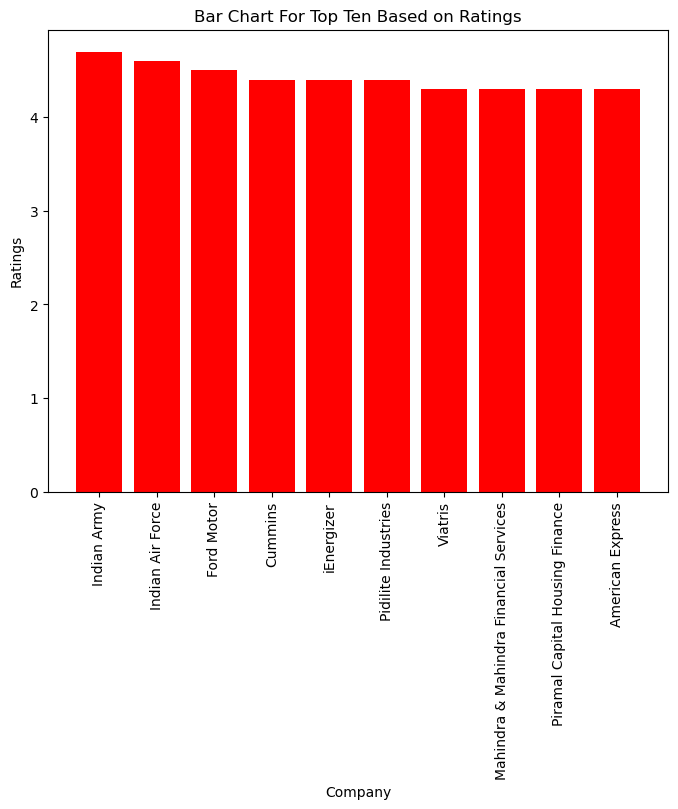

In [31]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(Top_Ten_Ratings["Company"], Top_Ten_Ratings["Ratings"],color='red')  # Create the bar chart

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Ratings')
plt.title('Bar Chart For Top Ten Based on Ratings')
plt.xticks(Top_Ten_Ratings["Company"],Top_Ten_Ratings["Company"],rotation=90)

### Bottom 10 Comapanies Based on Ratings

In [32]:
Bottom_Ten_Ratings=combined_data.sort_values(by=["Ratings"],ascending=True).head(10)
Bottom_Ten_Ratings

,Company,Ratings,Reviews,Salary,Interviews,Jobs
196,CMS IT Services,3.2,2300.0,11500.0,79.0,7.0
22,BYJU'S,3.2,12600.0,49800.0,1700.0,916.0
41,Startek,3.2,6100.0,23400.0,275.0,41.0
114,Oyo Rooms,3.4,3200.0,25000.0,148.0,166.0
144,L&T Technology Services,3.4,2800.0,28000.0,216.0,2.0
90,eClerx,3.5,3800.0,25600.0,276.0,67.0
42,Mphasis,3.5,6100.0,58600.0,417.0,71.0
99,JustDial,3.5,3600.0,15200.0,205.0,105.0
60,Paytm,3.5,4900.0,27700.0,365.0,529.0
86,Muthoot Finance,3.6,3900.0,11700.0,146.0,197.0


### Top Ten Companies based on Reviews and Ratings

In [33]:
Top_Ten_Review_Rating=combined_data.sort_values(by=["Reviews","Ratings"],ascending=False)
Top_Ten_Review_Rating.head(10)

,Company,Ratings,Reviews,Salary,Interviews,Jobs
0,TCS,3.8,63500.0,734700.0,5300.0,45.0
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
2,Cognizant,3.9,36900.0,497500.0,3200.0,620.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0,201.0
5,HDFC Bank,3.9,29500.0,125800.0,1300.0,426.0
6,Infosys,3.9,27800.0,417800.0,4300.0,902.0
7,Capgemini,3.9,25800.0,337900.0,2200.0,688.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0,1500.0
9,HCLTech,3.7,23400.0,250000.0,2100.0,715.0


In [53]:
Low_Ten_Review_Rating=combined_data.sort_values(by=["Reviews","Ratings"],ascending=True).head(10)
Low_Ten_Review_Rating

,Company,Ratings,Reviews,Salary,Interviews,Jobs
196,CMS IT Services,3.2,2300.0,11500.0,79.0,7.0
193,Publicis Sapient,3.6,2300.0,25500.0,274.0,189.0
195,Vishal Mega Mart,3.8,2300.0,7300.0,101.0,5.0
194,DCB Bank,3.9,2300.0,8700.0,111.0,138.0
192,Axis Direct,4.0,2300.0,8100.0,55.0,29.0
197,Glenmark Pharmaceuticals,4.0,2300.0,10800.0,75.0,36.0
199,Ipca Laboratories,4.0,2300.0,10500.0,95.0,34.0
190,Wipro Infotech,4.1,2300.0,19100.0,91.0,0.0
198,ABB Group,4.1,2300.0,14900.0,110.0,1.0
189,Cgi Group,4.2,2300.0,30200.0,150.0,198.0


**2.Comapny Reviews**

*Rank the companies based on 'Reviews'. Identify the maximum and minimum reviews companies.*

### Top 10 company based on Reviews

In [34]:
Top_Ten_Reviews=combined_data.sort_values(by=["Reviews"],ascending=False).head(10)
Top_Ten_Reviews

,Company,Ratings,Reviews,Salary,Interviews,Jobs
0,TCS,3.8,63500.0,734700.0,5300.0,45.0
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
2,Cognizant,3.9,36900.0,497500.0,3200.0,620.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
4,ICICI Bank,4.0,29900.0,137000.0,1600.0,201.0
5,HDFC Bank,3.9,29500.0,125800.0,1300.0,426.0
6,Infosys,3.9,27800.0,417800.0,4300.0,902.0
7,Capgemini,3.9,25800.0,337900.0,2200.0,688.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0,1500.0
9,HCLTech,3.7,23400.0,250000.0,2100.0,715.0


([<matplotlib.axis.XTick at 0x14ea2462a90>,
 [Text(0.0, 0, 'TCS'),
  Text(1.0, 0, 'Accenture'),
  Text(2.0, 0, 'Cognizant'),
  Text(3.0, 0, 'Wipro'),
  Text(4.0, 0, 'ICICI Bank'),
  Text(5.0, 0, 'HDFC Bank'),
  Text(6.0, 0, 'Infosys'),
  Text(7.0, 0, 'Capgemini'),
  Text(8.0, 0, 'Tech Mahindra'),
  Text(9.0, 0, 'HCLTech')])

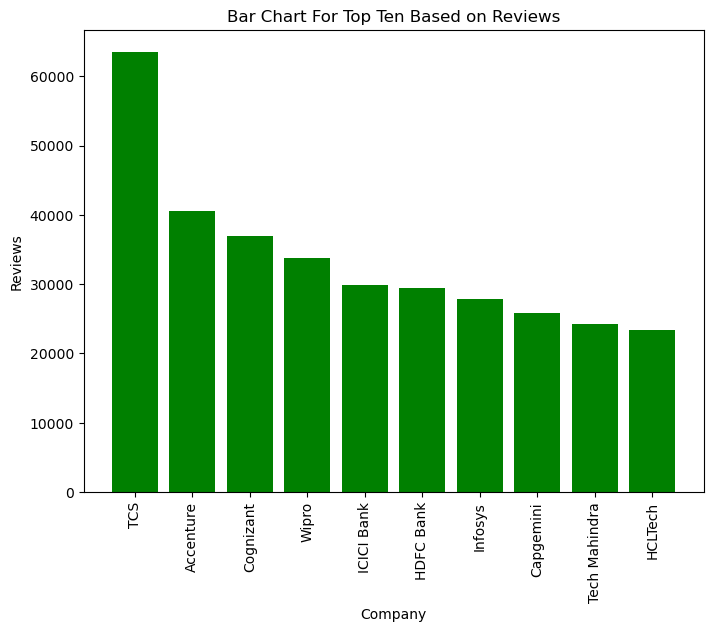

In [35]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(Top_Ten_Reviews["Company"], Top_Ten_Reviews["Reviews"],color='green')  # Create the bar chart

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Reviews')
plt.title('Bar Chart For Top Ten Based on Reviews')
plt.xticks(Top_Ten_Reviews["Company"],Top_Ten_Reviews["Company"],rotation=90)

In [36]:
Bottom_Ten_Reviews=combined_data.sort_values(by=["Reviews"],ascending=True).head(10)
Bottom_Ten_Reviews

,Company,Ratings,Reviews,Salary,Interviews,Jobs
199,Ipca Laboratories,4.0,2300.0,10500.0,95.0,34.0
188,Hindustan Coca Cola Beverages,4.3,2300.0,7500.0,72.0,61.0
189,Cgi Group,4.2,2300.0,30200.0,150.0,198.0
190,Wipro Infotech,4.1,2300.0,19100.0,91.0,0.0
191,Hindalco Industries,4.2,2300.0,9300.0,101.0,2.0
192,Axis Direct,4.0,2300.0,8100.0,55.0,29.0
198,ABB Group,4.1,2300.0,14900.0,110.0,1.0
194,DCB Bank,3.9,2300.0,8700.0,111.0,138.0
197,Glenmark Pharmaceuticals,4.0,2300.0,10800.0,75.0,36.0
193,Publicis Sapient,3.6,2300.0,25500.0,274.0,189.0


In [55]:
Bottom_Ten_Reviews["Company"]

199                Ipca Laboratories
188    Hindustan Coca Cola Beverages
189                        Cgi Group
190                   Wipro Infotech
191              Hindalco Industries
192                      Axis Direct
198                        ABB Group
194                         DCB Bank
197         Glenmark Pharmaceuticals
193                 Publicis Sapient
Name: Company, dtype: object

**3.Salary Analysis**

*Identify the company with the highest and lowest average salary.
Plot a histogram or box plot of 'Salary' to visualize its distribution and identify any outliers*

### Top Ten Company Based on Salary

In [37]:
Top_Ten_Salary=combined_data.sort_values(by=["Salary"],ascending=False)
Top_Ten_Salary=Top_Ten_Salary.head(10)

In [56]:
Top_Ten_Salary["Company"]

0               TCS
1         Accenture
2         Cognizant
6           Infosys
3             Wipro
7         Capgemini
9           HCLTech
8     Tech Mahindra
15              IBM
10          Genpact
Name: Company, dtype: object

([<matplotlib.axis.XTick at 0x14ea2500970>,
 [Text(0.0, 0, 'TCS'),
  Text(1.0, 0, 'Accenture'),
  Text(2.0, 0, 'Cognizant'),
  Text(3.0, 0, 'Infosys'),
  Text(4.0, 0, 'Wipro'),
  Text(5.0, 0, 'Capgemini'),
  Text(6.0, 0, 'HCLTech'),
  Text(7.0, 0, 'Tech Mahindra'),
  Text(8.0, 0, 'IBM'),
  Text(9.0, 0, 'Genpact')])

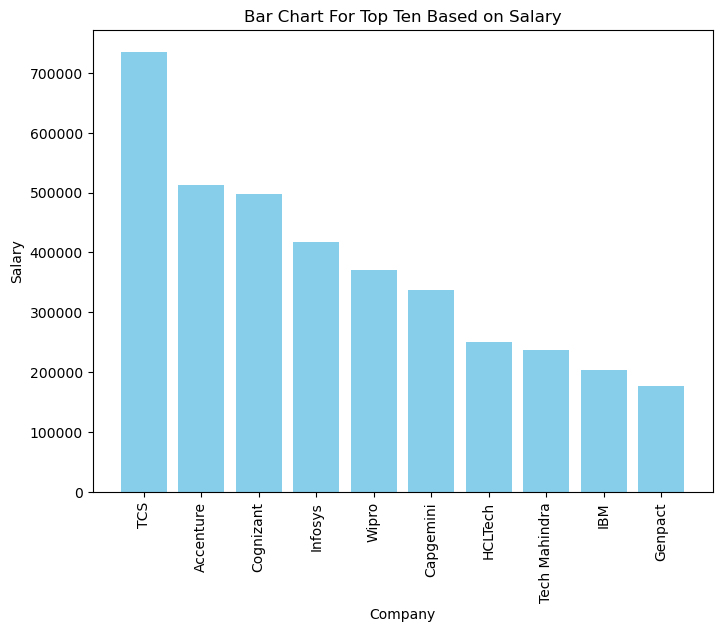

In [38]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(Top_Ten_Salary["Company"], Top_Ten_Salary["Salary"],color='skyblue')  # Create the bar chart

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Bar Chart For Top Ten Based on Salary')
plt.xticks(Top_Ten_Salary["Company"],Top_Ten_Salary["Company"],rotation=90)

In [39]:
Bottom_Ten_Salary=combined_data.sort_values(by=["Salary"])
Bottom_Ten_Salary.head(10)

,Company,Ratings,Reviews,Salary,Interviews,Jobs
186,Wipro Consumer Care & Lighting,3.8,2400.0,2800.0,38.0,33.0
74,Amazon Development Centre India,4.2,4300.0,4300.0,299.0,24.0
187,Indian Air Force,4.6,2400.0,5700.0,27.0,0.0
195,Vishal Mega Mart,3.8,2300.0,7300.0,101.0,5.0
188,Hindustan Coca Cola Beverages,4.3,2300.0,7500.0,72.0,61.0
147,Ekart Logistics,4.1,2800.0,7600.0,178.0,1.0
117,Manappuram Finance,4.0,3200.0,7700.0,86.0,1.0
154,Muthoot Fincorp,4.0,2700.0,8000.0,79.0,51.0
192,Axis Direct,4.0,2300.0,8100.0,55.0,29.0
138,Ecom Express,4.1,2900.0,8500.0,120.0,46.0


In [59]:
Bottom_Ten_Salary["Company"].head(10)

186     Wipro Consumer Care & Lighting
74     Amazon Development Centre India
187                   Indian Air Force
195                   Vishal Mega Mart
188      Hindustan Coca Cola Beverages
147                    Ekart Logistics
117                 Manappuram Finance
154                    Muthoot Fincorp
192                        Axis Direct
138                       Ecom Express
Name: Company, dtype: object

**4.Job Opportunities**:

*Identify the company with the most job opportunities ('Jobs').*

### Top 10 companies based on Job Opportunities

In [40]:
Top_Job_Opportunity=combined_data.sort_values(by=["Jobs"],ascending=False).head(10)
Top_Job_Opportunity

,Company,Ratings,Reviews,Salary,Interviews,Jobs
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
15,IBM,4.1,17800.0,203300.0,1300.0,3200.0
169,Randstad,3.9,2500.0,13000.0,150.0,2300.0
27,Ernst & Young,3.7,8800.0,105300.0,792.0,1700.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0,1500.0
93,Siemens,4.2,3800.0,27300.0,223.0,1400.0
77,KPMG India,3.6,4100.0,55400.0,451.0,1300.0
67,JP Morgan Chase,4.2,4500.0,60300.0,356.0,1100.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
22,BYJU'S,3.2,12600.0,49800.0,1700.0,916.0


([<matplotlib.axis.XTick at 0x14e9cab1ee0>,
 [Text(0.0, 0, 'Accenture'),
  Text(1.0, 0, 'IBM'),
  Text(2.0, 0, 'Randstad'),
  Text(3.0, 0, 'Ernst & Young'),
  Text(4.0, 0, 'Tech Mahindra'),
  Text(5.0, 0, 'Siemens'),
  Text(6.0, 0, 'KPMG India'),
  Text(7.0, 0, 'JP Morgan Chase'),
  Text(8.0, 0, 'Wipro'),
  Text(9.0, 0, "BYJU'S")])

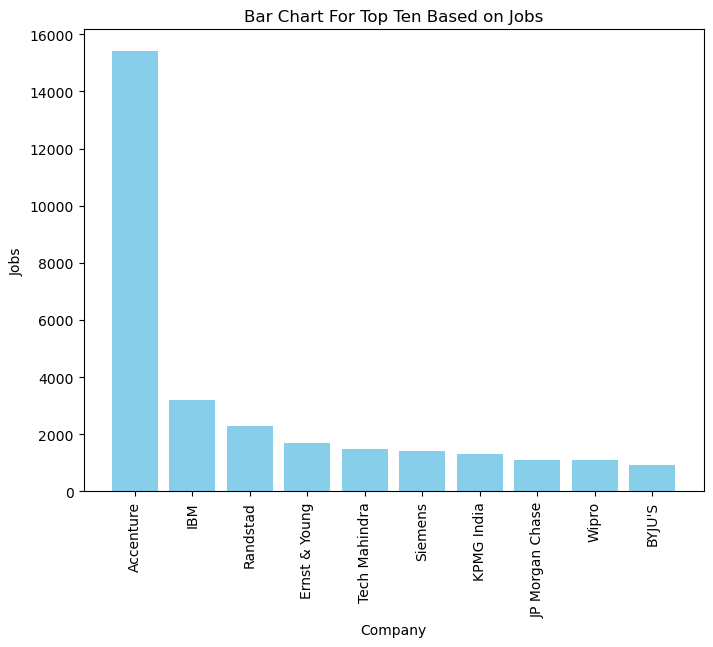

In [41]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(Top_Job_Opportunity["Company"], Top_Job_Opportunity["Jobs"],color='skyblue')  # Create the bar chart

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Jobs')
plt.title('Bar Chart For Top Ten Based on Jobs')
plt.xticks(Top_Job_Opportunity["Company"],Top_Job_Opportunity["Company"],rotation=90)

***Top_Ten_Company_SortedBy_Jobs_Salary***

In [42]:
Top_JobOpt_Salary=combined_data.sort_values(by=["Jobs","Salary"],ascending=False).head(10)
Top_JobOpt_Salary

,Company,Ratings,Reviews,Salary,Interviews,Jobs
1,Accenture,4.1,40500.0,513100.0,3600.0,15400.0
15,IBM,4.1,17800.0,203300.0,1300.0,3200.0
169,Randstad,3.9,2500.0,13000.0,150.0,2300.0
27,Ernst & Young,3.7,8800.0,105300.0,792.0,1700.0
8,Tech Mahindra,3.7,24200.0,236500.0,2100.0,1500.0
93,Siemens,4.2,3800.0,27300.0,223.0,1400.0
77,KPMG India,3.6,4100.0,55400.0,451.0,1300.0
3,Wipro,3.8,33700.0,370000.0,3100.0,1100.0
67,JP Morgan Chase,4.2,4500.0,60300.0,356.0,1100.0
22,BYJU'S,3.2,12600.0,49800.0,1700.0,916.0


([<matplotlib.axis.XTick at 0x14e9cb590d0>,
 [Text(0.0, 0, 'Accenture'),
  Text(1.0, 0, 'IBM'),
  Text(2.0, 0, 'Randstad'),
  Text(3.0, 0, 'Ernst & Young'),
  Text(4.0, 0, 'Tech Mahindra'),
  Text(5.0, 0, 'Siemens'),
  Text(6.0, 0, 'KPMG India'),
  Text(7.0, 0, 'Wipro'),
  Text(8.0, 0, 'JP Morgan Chase'),
  Text(9.0, 0, "BYJU'S")])

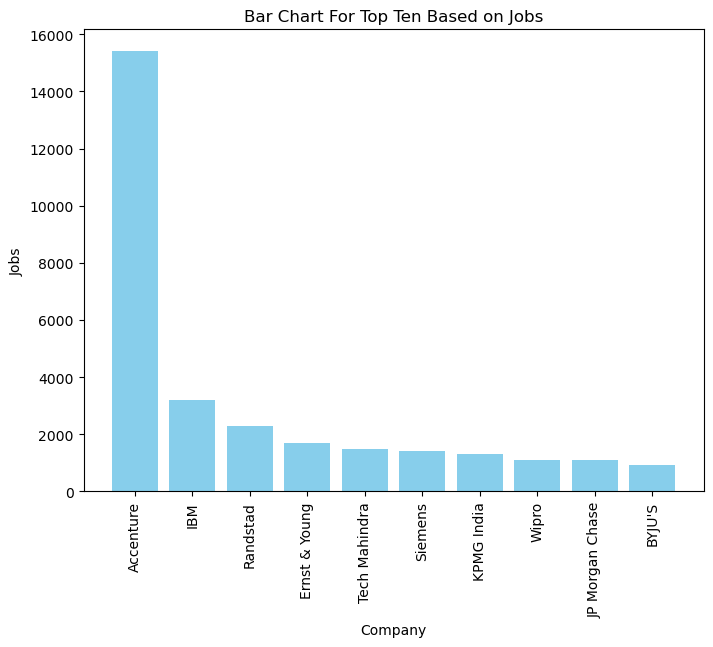

In [43]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.bar(Top_JobOpt_Salary["Company"], Top_JobOpt_Salary["Jobs"],color='skyblue')  # Create the bar chart

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Jobs')
plt.title('Bar Chart For Top Ten Based on Jobs')
plt.xticks(Top_JobOpt_Salary["Company"],Top_JobOpt_Salary["Company"],rotation=90)

In [44]:
# # Create subplots for efficient visualization
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# # Plot 1: Company Ratings
# sns.barplot(data=df, x='Company', y='Ratings', ax=axes[0, 0])
# axes[0, 0].set_title('Company Ratings')
# axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')

# # Plot 2: Company Reviews
# sns.barplot(data=df, x='Company', y='Reviews', ax=axes[0, 1])
# axes[0, 1].set_title('Company Reviews')
# axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')

# # Plot 3: Company Salary
# sns.barplot(data=df, x='Company', y='Salary', ax=axes[1, 0])
# axes[1, 0].set_title('Company Salary')
# axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')

# # Plot 4: Company Interviews
# sns.barplot(data=df, x='Company', y='Interviews', ax=axes[1, 1])
# axes[1, 1].set_title('Company Interviews')
# axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')

***Interviews vs. Ratings:***

*Analyze if there's any correlation between the number of interviews and company ratings.*


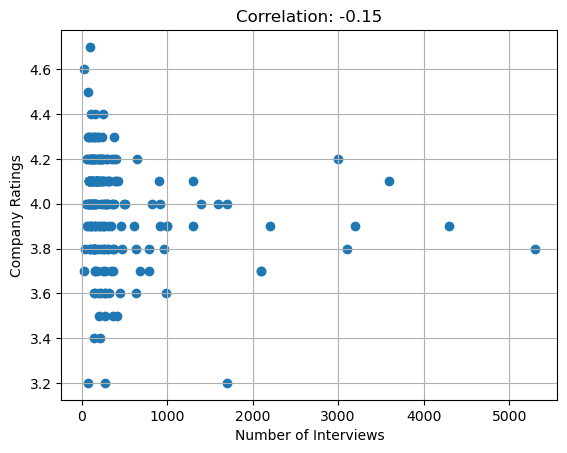

Correlation Coefficient: -0.15


In [45]:
# Calculate the correlation between 'Interviews' and 'Ratings'
correlation = combined_data['Interviews'].corr(combined_data['Ratings'])

# Create a scatter plot
plt.scatter(combined_data['Interviews'], combined_data['Ratings'])
plt.xlabel('Number of Interviews')
plt.ylabel('Company Ratings')
plt.title(f'Correlation: {correlation:.2f}')
plt.grid(True)

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')

***Salary vs. Ratings:***

*Explore whether higher salaries are associated with higher ratings*

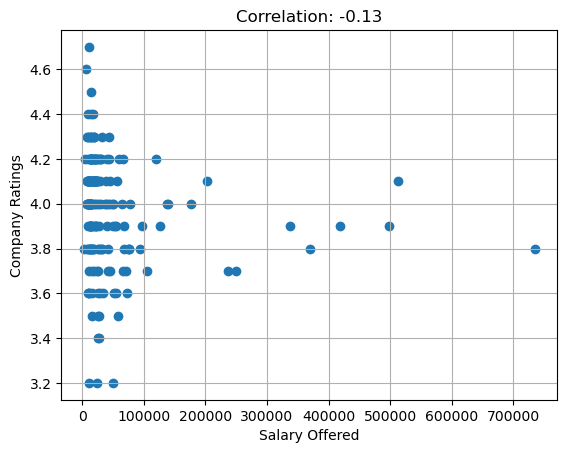

Correlation Coefficient: -0.13


In [46]:
# Calculate the correlation between 'Interviews' and 'Ratings'
correlation = combined_data['Salary'].corr(combined_data['Ratings'])

# Create a scatter plot
plt.scatter(combined_data['Salary'], combined_data['Ratings'])
plt.xlabel('Salary Offered')
plt.ylabel('Company Ratings')
plt.title(f'Correlation: {correlation:.2f}')
plt.grid(True)

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')

***Jobs Vs salary***


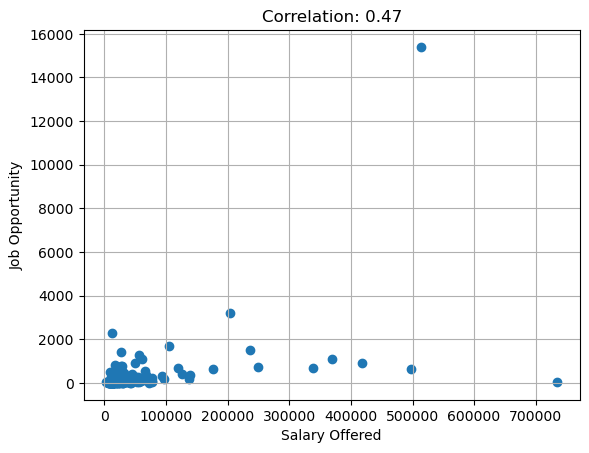

Correlation Coefficient: 0.47


In [47]:
# Calculate the correlation between 'Interviews' and 'Ratings'
correlation = combined_data['Salary'].corr(combined_data['Jobs'])

# Create a scatter plot
plt.scatter(combined_data['Salary'], combined_data['Jobs'])
plt.xlabel('Salary Offered')
plt.ylabel('Job Opportunity')
plt.title(f'Correlation: {correlation:.2f}')
plt.grid(True)

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')

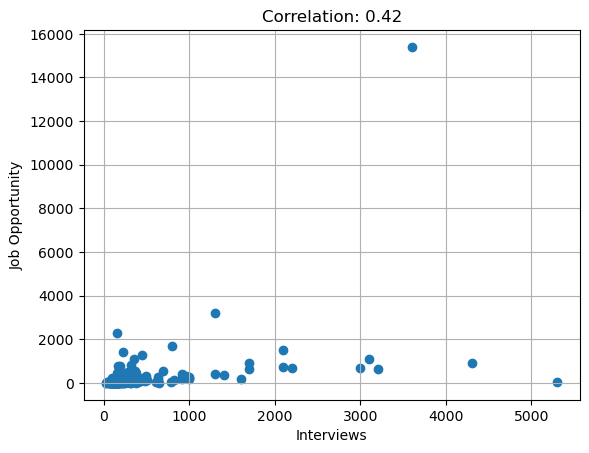

Correlation Coefficient: 0.42


In [48]:
# Calculate the correlation between 'Interviews' and 'Ratings'
correlation = combined_data['Interviews'].corr(combined_data['Jobs'])

# Create a scatter plot
plt.scatter(combined_data['Interviews'], combined_data['Jobs'])
plt.xlabel('Interviews')
plt.ylabel('Job Opportunity')
plt.title(f'Correlation: {correlation:.2f}')
plt.grid(True)

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')